In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graph import Graph
import utm

# Funções auxiliares


In [121]:
def read_polygon(filename, comma_separated=False, invert_x_y=False, close_polygon=True):
    xs = []
    ys = []
    with open(filename) as f:
        for line in f:
            stripped_line = line.strip()
            if len(stripped_line) == 0:
                continue
            if "," in line:
                x, y = [float(value) for value in line.split(",")]
            else:
                x, y = [float(value) for value in line.split()]
            xs.append(x)
            ys.append(y)

    if close_polygon and (xs[0] != xs[-1] or ys[0] != ys[-1]):
        xs.append(xs[0])
        ys.append(ys[0])

    if invert_x_y:
        return ys, xs
    else:
        return xs, ys


In [122]:
def plot_path(path, df_airports, ax):
    xs = []
    ys= []
    names = []
    for airport in path:
        row = df_airports[df_airports.id == airport].iloc[0]
        lon = row["lon"]
        lat = row["lat"]
        # x, y = utm.from_latlon(lat, lon)[:2]
        x, y = lon, lat
        xs.append(x)
        ys.append(y)
        names.append(row["city"])

    # Plot xs and ys with arrows indicating the direction
    ax.plot(xs, ys, marker='o', lw=0)
    for i in range(len(xs)-1):
        ax.annotate("", xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]), arrowprops=dict(arrowstyle="->"), color='r')


    return xs, ys, names

# Construindo Dataframe dos aeroportos

In [123]:
# df = pd.read_csv('BrFlights2.csv', encoding='latin1')
# df = df[columns]
# df_group = df.groupby(group_columns).mean().reset_index()
# df_group.to_csv("BrFlights2_group.csv", index=False)

In [124]:
columns = ["Aeroporto.Origem", "Cidade.Origem", "Pais.Origem", "Aeroporto.Destino", "Cidade.Destino", "Pais.Destino", "LatOrig", "LongOrig", "LatDest", "LongDest"]
group_columns = columns[:6]

In [125]:
df_group = pd.read_csv('BrFlights2_group.csv')


In [126]:
# Build Airports

airports ={} 
id_to_airport = {}

id = 0
for row in df_group.iterrows():

    name = row[1]["Aeroporto.Origem"]
    if name not in airports:
        id_to_airport[id] = name
        airports[name] = {
            "name": name,
            "country": row[1]["Pais.Origem"],
            "city": row[1]["Cidade.Origem"],
            "lat": row[1]["LatOrig"],
            "lon": row[1]["LongOrig"],
            "id": id}
        id+=1
    name = row[1]["Aeroporto.Destino"]
    if name not in airports:
        airports[name] = {
            "name": name,
            "country": row[1]["Pais.Destino"],
            "city": row[1]["Cidade.Destino"],
            "lat": row[1]["LatDest"],
            "lon": row[1]["LongDest"], 
            "id": id}
        id+=1

df_airports = pd.DataFrame.from_dict(airports, orient='index').reset_index()

In [127]:
g = Graph(len(df_airports))

for row in df_group.iterrows():
    id0 = airports[row[1]["Aeroporto.Origem"]]["id"]
    id1 = airports[row[1]["Aeroporto.Destino"]]["id"]
    g.add_edge(id0, id1, check=True)
    

# Questão 3

## Item b


In [128]:
df_airports[(df_airports.city == "Roma") | (df_airports.city =="Fernando De Noronha")]

,index,name,country,city,lat,lon,id
56,Roma,Roma,Italia,Roma,41.799053,12.592979,56
147,Fernando De Noronha,Fernando De Noronha,Brasil,Fernando De Noronha,-3.854614,-32.424385,147


In [129]:
roma_id = df_airports[df_airports.city == "Roma"].iloc[0].id
fernando_noronha_id = df_airports[df_airports.city == "Fernando De Noronha"].iloc[0].id
print(f"Roma = {roma_id} and Fernando De Noronha = {fernando_noronha_id}")

Roma = 56 and Fernando De Noronha = 147


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


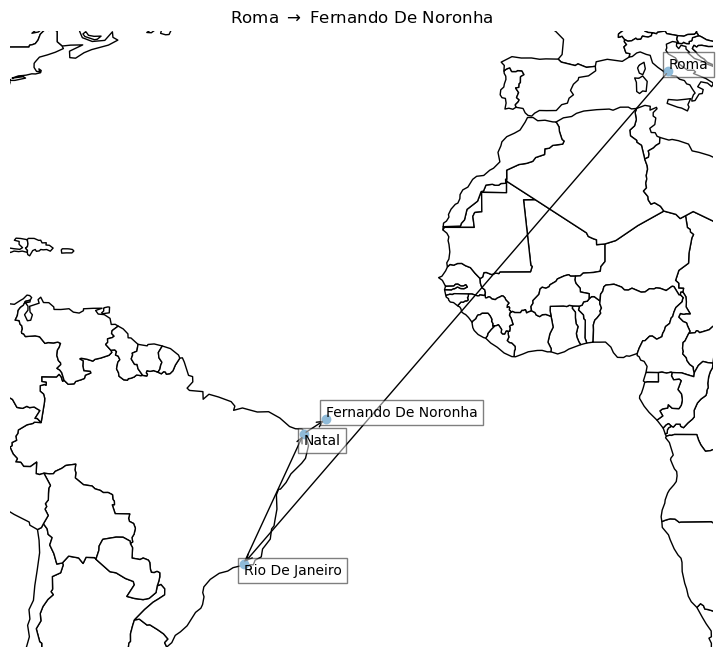

In [135]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data from Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='white', edgecolor='k')
xs, ys, names = plot_path(roma_to_fernando, df_airports, ax)

for i in range(len(xs)):
    if i == 0:
        ax.text(xs[i], ys[i], names[i], va="bottom", ha="left", bbox=dict(facecolor="w",alpha=0.5))
    elif i == 3:
        ax.text(xs[i], ys[i], names[i], va="bottom", ha="left", bbox=dict(facecolor="w",alpha=0.5))
    else:
        ax.text(xs[i], ys[i], names[i], va="top", ha="left", bbox=dict(facecolor="w",alpha=0.5))

# Customize the plot (optional)
ax.set_title(r"Roma $\rightarrow$ Fernando De Noronha")
ax.set_axis_off()

xmin, ymin, _,_ = world[world.name == "Brazil"].geometry.iloc[0].bounds
_, _, xmax,ymax = world[world.name == "Italy"].geometry.iloc[0].bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Display the plot
plt.show()

In [ ]:
marcado, caminho = g.bfs(roma_id)
roma_to_fernando = g.build_path(caminho, fernando_noronha_id)